In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/book-recommendation-dataset/Ratings.csv
/kaggle/input/book-recommendation-dataset/Users.csv
/kaggle/input/book-recommendation-dataset/Books.csv


In [2]:
#read all the input files
books = pd.read_csv("../input/book-recommendation-dataset/Books.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
users = pd.read_csv("../input/book-recommendation-dataset/Users.csv")
ratings = pd.read_csv("../input/book-recommendation-dataset/Ratings.csv")

In [4]:
#Selecting only useful information ( removing image URLs)
books = books.iloc[:,:5]

In [5]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [6]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
#Groupby to see which user has rated how many books
user_rating_count = ratings.groupby('User-ID').count().sort_values(by = 'ISBN', ascending = False)

In [9]:
user_rating_count.shape

(105283, 2)

In [10]:
#keep only those users who have given ratings to more than 100 books)
user_rating_count = user_rating_count[user_rating_count['ISBN']>300]

In [11]:
user_rating_count.shape

(559, 2)

In [12]:
#Get counts of the ratings for each book
book_rating_count = ratings.groupby('ISBN').count().sort_values(by = 'Book-Rating', ascending = False)

In [13]:
book_rating_count.head(10)

,User-ID,Book-Rating
ISBN,,
0971880107,2502,2502
0316666343,1295,1295
0385504209,883,883
0060928336,732,732
0312195516,723,723
044023722X,647,647
0679781587,639,639
0142001740,615,615
067976402X,614,614


In [14]:
#only keep books with more than 50 ratings
book_rating_count = book_rating_count[book_rating_count['User-ID'] > 300]

In [15]:
ratings = ratings.merge(books, on = 'ISBN')

In [16]:
ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


In [17]:
ratings.shape

(1031136, 7)

In [18]:
ratings = ratings[ratings['User-ID'].isin(user_rating_count.index)]

In [19]:
ratings = ratings[ratings['ISBN'].isin(book_rating_count.index)]

In [20]:
ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
1994,254,043935806X,0,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic
1997,6251,043935806X,9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic
2000,6575,043935806X,0,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic
2004,11676,043935806X,0,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic
2011,21014,043935806X,0,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic


In [21]:
piv_table = ratings.pivot_table(columns = "User-ID", index = "ISBN", values = "Book-Rating")

In [22]:
piv_table.shape

(81, 539)

So we have 2101 books and 1792 users.


In [23]:
piv_table.iloc[:100, :100]

User-ID,254,2276,3363,4385,6251,6543,6575,7158,7346,8681,...,52199,52203,52584,52614,52853,52917,53174,54218,55187,55490
ISBN,,,,,,,,,,,,,,,,,,,,,
0060502258,NaN,NaN,0.0,NaN,NaN,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
0060928336,NaN,NaN,0.0,NaN,NaN,NaN,8.0,NaN,0.0,0.0,...,NaN,NaN,0.0,NaN,NaN,4.0,0.0,NaN,NaN,NaN
0060930535,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0060934417,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0060938455,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0743418174,NaN,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,NaN,...,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0786868716,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0804106304,0.0,NaN,NaN,NaN,0.0,NaN,9.0,NaN,9.0,NaN,...,0.0,NaN,7.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN


As you can see it is a very sparse table with most values as NaN. We will replace Nan to 0 to logically define that if  user A has given a rating of 0 we will not recommend that to similar users. This is true if user A has not read the book as well.

In [24]:
piv_table = piv_table.fillna(0)

In [25]:
pd.DataFrame(piv_table).isnull().sum().sum()

0

In [26]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')
model.fit(piv_table)

NearestNeighbors(algorithm='brute')

Let's list a few books at random and see which one wwe know. 

In [27]:
ratings.sample(frac = 0.001)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
22696,187145,0345342968,9,Fahrenheit 451,RAY BRADBURY,1987,Del Rey
38699,268030,0452282152,0,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books
191641,225763,0060987103,5,Wicked: The Life and Times of the Wicked Witch...,Gregory Maguire,1996,Regan Books
49497,270713,0345361792,0,A Prayer for Owen Meany,John Irving,1990,Ballantine Books
148753,102702,044021145X,0,The Firm,John Grisham,1992,Bantam Dell Publishing Group
44403,273979,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial
10489,94923,0971880107,0,Wild Animus,Rich Shapero,2004,Too Far
43014,55734,0684872153,0,Angela's Ashes (MMP) : A Memoir,Frank McCourt,1999,Scribner
82448,35859,0440214041,0,The Pelican Brief,John Grisham,1993,Dell


I had to sample multiple times to get a book that I have read. 'The Fellowship of the Ring' with ISBN 0618002227 at index 196979

In [28]:
piv_table[piv_table.index == '0618002227']

User-ID,254,2276,3363,4385,6251,6543,6575,7158,7346,8681,...,270713,271284,273979,274004,274061,274301,274308,275970,277427,278418
ISBN,,,,,,,,,,,,,,,,,,,,,


In [29]:
test_book = piv_table[piv_table.index == '0618002227'].values

In [30]:
test_book

array([], shape=(0, 539), dtype=float64)

In [31]:
#model.kneighbors(test_book)

In [32]:
#_, closest = model.kneighbors(test_book)

From the doc we are getting distances and the 

In [33]:
#for i in closest[:5]:
 #   print(i)

In [34]:
#for i in closest[:5][0]:
   # print(books[books['ISBN'] == piv_table.index[i]])

In [35]:
books2 = pd.read_csv("../input/book-recommendation-dataset/Books.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [36]:
users2 = pd.read_csv("../input/book-recommendation-dataset/Users.csv")
ratings2 = pd.read_csv("../input/book-recommendation-dataset/Ratings.csv")

In [37]:
new_df=books2.merge(ratings2,on='ISBN')
new_df.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0


In [38]:
new_df.shape

(1031136, 10)

In [39]:
df_with_num_ratings=new_df.groupby(['Book-Title']).count().reset_index()[['Book-Title','Book-Rating']].rename(columns={'Book-Rating':'Num_of_ratings'})
df_with_num_ratings.head()

,Book-Title,Num_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [40]:
df_with_num_ratings.shape

(241071, 2)

In [41]:
df_with_avg_ratings=new_df.groupby(['Book-Title']).mean().reset_index()[['Book-Title','Book-Rating']].rename(columns={'Book-Rating':'avg_ratings'})
df_with_avg_ratings.head()

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


In [42]:
df_with_avg_ratings.shape

(241071, 2)

In [43]:
books_sorted=df_with_num_ratings.merge(df_with_avg_ratings,on='Book-Title').sort_values(by=['Num_of_ratings'],ascending=False)
books_sorted.head(7)

,Book-Title,Num_of_ratings,avg_ratings
234951,Wild Animus,2502,1.019584
196326,The Lovely Bones: A Novel,1295,4.468726
183573,The Da Vinci Code,898,4.642539
5303,A Painted House,838,3.231504
199237,The Nanny Diaries: A Novel,828,3.530193
27922,Bridget Jones's Diary,815,3.527607
206502,The Secret Life of Bees,774,4.447028


In [44]:
popular_books=books_sorted[books_sorted['Num_of_ratings']>300].sort_values(by=['avg_ratings'],ascending=False).head(100)
popular_books.head(10)

,Book-Title,Num_of_ratings,avg_ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
219741,To Kill a Mockingbird,510,4.700000
183573,The Da Vinci Code,898,4.642539
187880,The Five People You Meet in Heaven,430,4.551163
180556,The Catcher in the Rye,449,4.545657


In [45]:
popular_books.shape

(100, 3)

In [46]:
popular_books=popular_books.merge(books2,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Num_of_ratings','avg_ratings']]


In [47]:
popular_books.head()

,Book-Title,Num_of_ratings,avg_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
5,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
9,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
12,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370


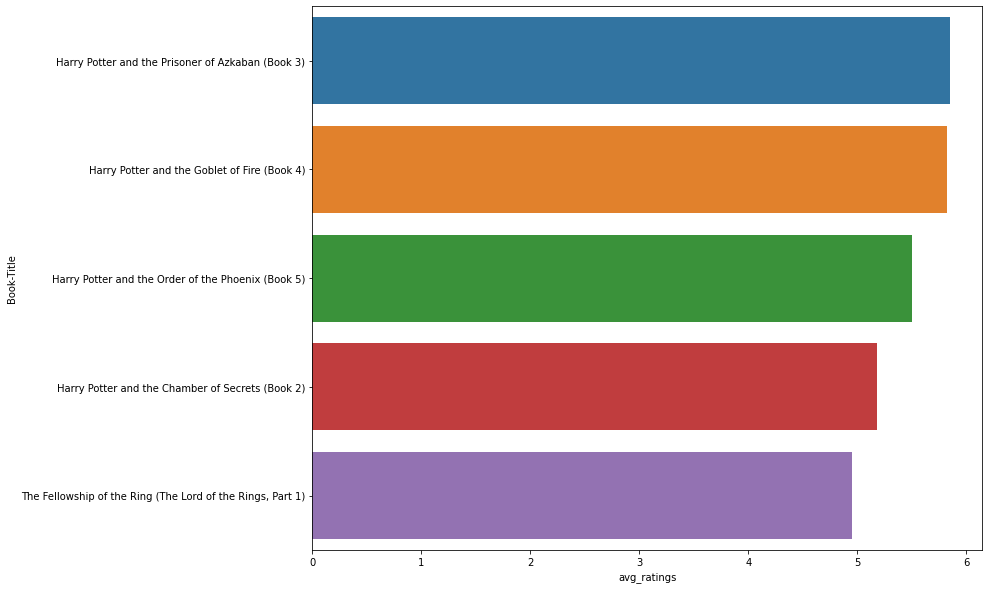

In [48]:
plt.figure(figsize=(7,5))
sns.barplot(x=popular_books['avg_ratings'].head(4),y=popular_books['Book-Title'].head(4));

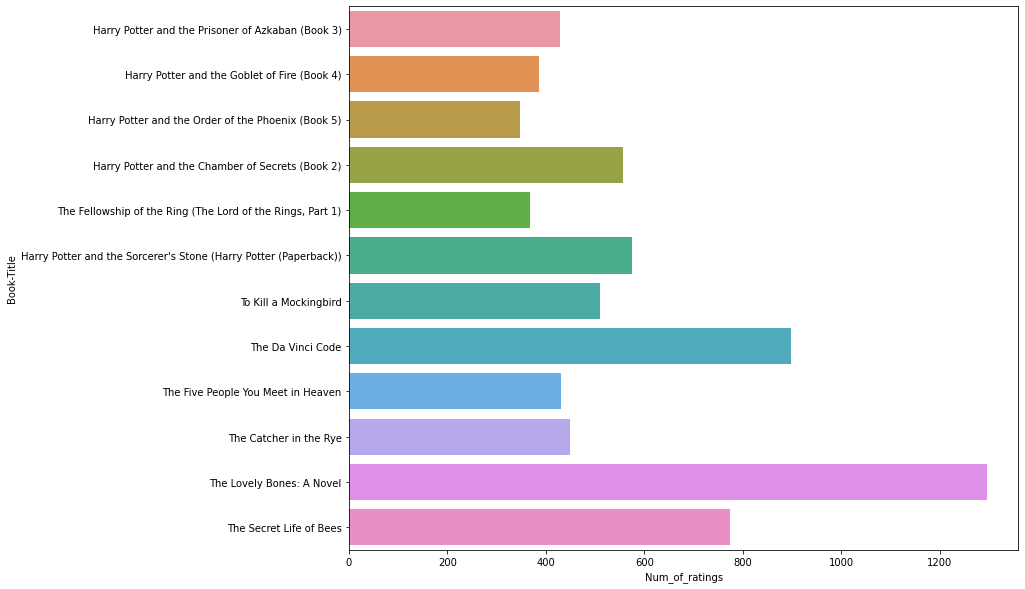

In [49]:
plt.figure(figsize=(18,8))
sns.barplot(x=popular_books['Num_of_ratings'].head(15),y=popular_books['Book-Title'].head(15));